<a href="https://www.kaggle.com/code/sjagkoo7/boston-house-prices-am?scriptVersionId=139667459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

# Data Preprocessing

In [2]:
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('/kaggle/input/boston-house-prices/housing.csv',header=None,delimiter=r"\s+",names=column_names)

data.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [7]:
# Check for missing values
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Finding out the correlation between the features
corr=data.corr()
#corr
corr.shape

(14, 14)

<AxesSubplot:>

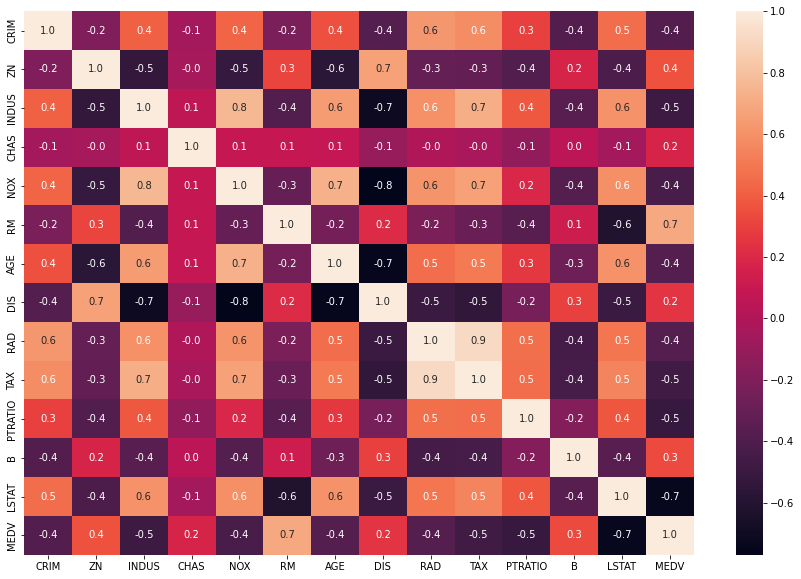

In [11]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.1f')

#### no cleaning required 
#### now moving to feature engineering
# Bulilding the model

In [12]:
# Spliting target variable and independent variables
#X= independent variables  or explanatory variable or causes variable
#y= target variable or final goal
X= data.drop('MEDV',axis=1)
y=data['MEDV']

#### Notes Reg. Random State selection
**Why do we choose random state as 42 very often during training a machine learning model? why we dont choose 12 or 32 or 5?  Is there a scientific explanation?**
- If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.
- To be specific, 42 has nothing to do with AI or ML. It is actually a generic number, In Machine Learning, it doesn't matter what the actual random number is, as mentioned in scikit API doc, any INTEGER is sufficient enough for the task at hand.
- 42 is a reference from Hitchhikers guide to galaxy book. The answer to life universe and everything and is meant as a joke. It has no other significance.

In [13]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

# Multiple Linear Regression

Training the model

In [14]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lr=LinearRegression()
# Train the model using the training sets
lr.fit(X_train,y_train)

LinearRegression()

- if y^ is the predicted value.
- y^(w, x) = w0 + w1x1+. . . +wpxp
- Across the module, we designate the vector w = (w1, . . . , wp)  as coef_ and w0 as intercept_ .

In [15]:
# Value of y intercept
lr.intercept_

36.357041376595056

In [16]:
#Converting the coefficient values to a dataframe
coeffcients=pd.DataFrame([X_train.columns,lr.coef_]).T
coeffcients=coeffcients.rename(columns={0:'Attribute',1:'Coeffcients'})
coeffcients

,Attribute,Coeffcients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


# Model Prediction

In [17]:
# Model prediction on train data
y_pred=lr.predict(X_train)

- Formula :
R^2 Adjusted = 1- {(1-R^2)(n-1)/(n-p-1)}
- R^2 = normal R^2 square
- n = no.of rows in data set
- p = no. of features

# Model Evaluation

In [18]:
#model Evaluation
from sklearn import metrics
print('R^2:', metrics.r2_score(y_train,y_pred))
print('Adjusted R^2 :', 1-((1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)) )
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
#print('MSE:',type(metrics.mean_squared_error(y_train,y_pred)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
train_predicted_score = [0.7465991966746854,0.736910342429894,3.08986109497113,19.07368870346903,4.367343437774162]

R^2: 0.7465991966746854
Adjusted R^2 : 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

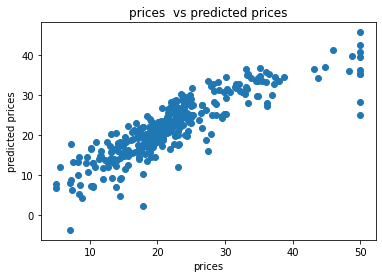

In [19]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('prices  vs predicted prices')
plt.show()

#### There are four assumptions associated with a linear regression model:
- Linearity: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

Text(0.5, 1.0, 'Predicted vs Residuals')

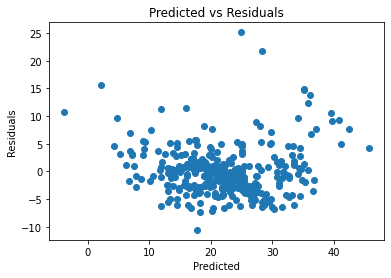

In [20]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

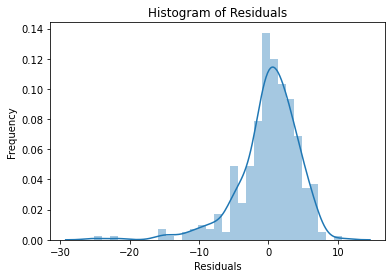

In [21]:
# Checking Normality of errors
sns.distplot(y_pred-y_train)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

Here the residuals are normally distributed. So normality assumption is satisfied



#### Predicting the value using test data in trained model

In [22]:
# Predicting Test data with the model
y_test_pred=lr.predict(X_test)


In [23]:
#model Evaluation
from sklearn import metrics
print('R^2:', metrics.r2_score(y_test,y_test_pred))
print('Adjusted R^2 :', 1-((1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)) )
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
#print('MSE:',type(metrics.mean_squared_error(y_test,y_test_pred)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
test_predicted_score=[0.7121818377409181,0.6850685326005699,3.8590055923707487,30.053993307124273,5.4821522513629874]

R^2: 0.7121818377409181
Adjusted R^2 : 0.6850685326005699
MAE: 3.8590055923707487
MSE: 30.053993307124273
RMSE: 5.4821522513629874


In [24]:
#comparing model evaluation values on train and test data.
score_compare=pd.DataFrame({'train_predicted_score':train_predicted_score ,'test_predicted_score':test_predicted_score })
score_compare.index=['R^2','Adjusted R^2','MAE','MSE','RMSE']
score_compare

,train_predicted_score,test_predicted_score
R^2,0.746599,0.712182
Adjusted R^2,0.736910,0.685069
MAE,3.089861,3.859006
MSE,19.073689,30.053993
RMSE,4.367343,5.482152


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.